In [ ]:
import os
import numpy as impo 
import aicspylibczi
from aicspylibczi import CziFile
from tifffile import imwrite
import matplotlib.pyplot as plt

3.2.0


Phenotype Image (CZI to TIFF conversion)

In [61]:
# Input .czi file and output directory
czi_file_path = "D:/OPS_Nov_2024/Phenotype_Bin1X1_U.czi"  # Replace with your .czi file path
out_dir = "D:/OPS_Nov_2024/TIFF"         # Replace with your desired output directory

# Create output directory if it doesn't exist
os.makedirs(out_dir, exist_ok=True)

In [24]:
#readin the czi file
czi = CziFile(czi_file_path)

czi.dims: SCMYX
czi.size: (1, 2, 440, 4416, 4352)


AttributeError: 'CziFile' object has no attribute 'subblock_directory'

In [25]:
# Get the metadata
dims_string = czi.dims  # e.g. "SCMYX"
print(f"Dimension string from czi.dims: {dims_string}")
# Get the shape
size_tuple = czi.size   # e.g. (1, 2, 440, 4416, 4352)
print(f"Size tuple from czi.size: {size_tuple}")

Dimension string from czi.dims: SCMYX
Size tuple from czi.size: (1, 2, 440, 4416, 4352)


In [26]:
# By default: czi.size returns (S, C, M, Y, X)
S, C, M, Y, X = size_tuple

In [46]:
data = czi.read_image(S=0, M=1)
print(type(data))
# plot using matplotlib¶
img_array, dims_info = data  # unpack the tuple

print(type(img_array))  # should now be <class 'numpy.ndarray'>

# Print the type and (if possible) the shape:
print("Type of img_array:", type(img_array))
if hasattr(img_array, 'shape'):
    print("Shape of img_array:", img_array.shape)
    print("Number of dimensions:", img_array.ndim)
else:
    print("No shape attribute found.")

<class 'tuple'>
<class 'numpy.ndarray'>
(1, 2, 1, 4416, 4352)
Type of img_array: <class 'numpy.ndarray'>
Shape of img_array: (1, 2, 1, 4416, 4352)
Number of dimensions: 5


In [50]:
plane_2d = img_array[0, 0, 0, :, :]


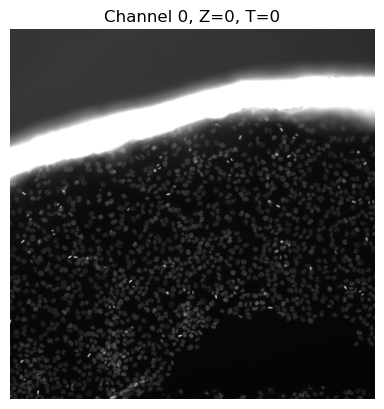

In [51]:
plane_2d_c1 = img_array[0, 0, 0, :, :]  # (T=0, C=0, Z=0, all Y, all X)
plt.imshow(plane_2d_c1, cmap='gray')
plt.title("Channel 0, Z=0, T=0")
plt.axis('off')
plt.show()

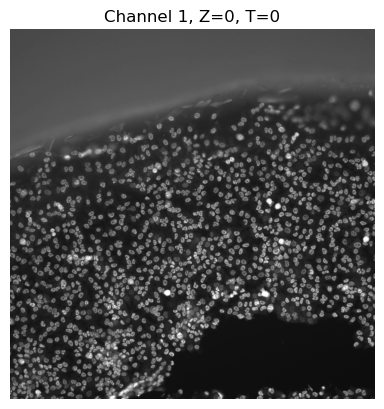

In [56]:
plane_2d_c2 = img_array[0, 1, 0, :, :]  # (T=0, C=1, Z=0, all Y, all X)
plt.imshow(plane_2d_c2, cmap='gray')
plt.title("Channel 1, Z=0, T=0")
plt.axis('off')
plt.show()

In [58]:
print(czi.get_dims_shape())
shapes = czi.get_dims_shape()  # returns a list of dicts
shape_dict = shapes[0]        # usually just one dictionary unless you have multiple 'scenes' at the top level

# 'M': (0, 440)  => from 0 to 439 inclusive
m_start, m_end = shape_dict['M']
num_tiles = m_end - m_start   # 440 - 0 = 440

print(f"Number of tiles: {num_tiles}")

[{'X': (0, 4352), 'Y': (0, 4416), 'C': (0, 2), 'M': (0, 440), 'S': (0, 1)}]
Number of tiles: 440


In [62]:
for tile_idx in range(num_tiles):
    # Read this tile. If you only have 1 scene, specifying S=0 helps avoid ambiguity
    img_array = czi.read_image(S=0, M=tile_idx)
    
    # Some versions of aicspylibczi return a tuple (data, dims_info); if so, unpack:
    if isinstance(img_array, tuple):
        img_array, dims_info = img_array

    # img_array should be a 5D numpy array with shape (T=1, C=2, Z=1, Y=4416, X=4352)
    # Index out T=0, Z=0 for each channel
    plane_dapi = img_array[0, 0, 0, :, :]   # T=0, C=0 (DAPI), Z=0
    plane_af488 = img_array[0, 1, 0, :, :]  # T=0, C=1 (AF488), Z=0
    
    # Construct filenames
    dapi_outpath = os.path.join(out_dir, f"Pheno_{tile_idx:03d}_DAPI.tif")
    af488_outpath = os.path.join(out_dir, f"Pheno_{tile_idx:03d}_AF488.tif")
    
    # Save each channel as a separate TIFF
    imwrite(dapi_outpath, plane_dapi)
    imwrite(af488_outpath, plane_af488)
    
    print(f"Saved Tile {tile_idx:03d} -> DAPI: {dapi_outpath}, AF488: {af488_outpath}")

Saved Tile 000 -> DAPI: D:/OPS_Nov_2024/Trial\tile_000_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\tile_000_AF488.tif
Saved Tile 001 -> DAPI: D:/OPS_Nov_2024/Trial\tile_001_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\tile_001_AF488.tif
Saved Tile 002 -> DAPI: D:/OPS_Nov_2024/Trial\tile_002_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\tile_002_AF488.tif
Saved Tile 003 -> DAPI: D:/OPS_Nov_2024/Trial\tile_003_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\tile_003_AF488.tif
Saved Tile 004 -> DAPI: D:/OPS_Nov_2024/Trial\tile_004_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\tile_004_AF488.tif
Saved Tile 005 -> DAPI: D:/OPS_Nov_2024/Trial\tile_005_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\tile_005_AF488.tif
Saved Tile 006 -> DAPI: D:/OPS_Nov_2024/Trial\tile_006_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\tile_006_AF488.tif
Saved Tile 007 -> DAPI: D:/OPS_Nov_2024/Trial\tile_007_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\tile_007_AF488.tif
Saved Tile 008 -> DAPI: D:/OPS_Nov_2024/Trial\tile_008_DAPI.tif, AF488: D:/OPS_Nov_2024/Trial\ti

In [3]:
##Move Border Tiles to a separate folder
import os
import shutil
import glob

def move_border_tile_images(input_folder, border_tiles):
    """
    Move all image files associated with border tiles into a subfolder within the input directory.
    
    Parameters:
    - input_folder: Path to the folder containing the image files.
    - border_tiles: List of tile numbers formatted as zero-padded strings.
    """
    # Create the subfolder for storing border tile images
    output_folder = os.path.join(input_folder, "border_tile_images")
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop through all border tiles and move matching files
    for tile_number in border_tiles:
        # Match files with the specific tile number in the name
        search_pattern = os.path.join(input_folder, f"*Tile-{tile_number}_*.tif")
        matching_files = glob.glob(search_pattern)
        
        for file_path in matching_files:
            # Move the file to the border tile subfolder
            shutil.move(file_path, os.path.join(output_folder, os.path.basename(file_path)))
            print(f"Moved: {file_path} -> {output_folder}")

    print("All border tile images have been moved successfully.")

# Define the border tiles based on your previous selection
border_tiles = [
    '000', '001', '002', '003', '004', '005', '006', '007', '008', '009',
    '010', '011', '012', '013', '014', '015', '016', '017', '018', '019',
    '020', '021', '022', '043', '044', '065', '066', '087', '088', '109',
    '110', '131', '132', '153', '154', '175', '176', '197', '198', '219',
    '220', '241', '242', '263', '264', '285', '286', '307', '308', '329',
    '330', '351', '352', '373', '374', '395', '396', '417', '418', '419',
    '420', '421', '422', '423', '424', '425', '426', '427', '428', '429',
    '430', '431', '432', '433', '434', '435', '436', '437', '438', '439'
]

# Example usage:
# Replace 'YOUR_FOLDER_PATH' with your actual folder path containing the images
input_folder_path = r"D:/OPS_Nov_2024/TIFF"
move_border_tile_images(input_folder_path, border_tiles)


Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-1_Tile-000_c0_DAPI.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-1_Tile-000_c1_G-Filter.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-1_Tile-000_c2_T-Filter.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-1_Tile-000_c3_A-Filter.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-1_Tile-000_c4_C-Filter.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-2_Tile-000_c0_DAPI.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-2_Tile-000_c1_G-Filter.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-2_Tile-000_c2_T-Filter.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Round-2_Tile-000_c3_A-Filter.tif -> D:/OPS_Nov_2024/TIFF\border_tile_images
Moved: D:/OPS_Nov_2024/TIFF\ISS-Roun

In [6]:
##Apply gamma adjustement to the TIFF images and put them in a seperate folder
##The gamma value will be 0.56 and will be applied to Phenotype images only (so images that have file name starting with "Phenotype")

import os
import glob
from skimage import io, exposure

def gamma_correct_phenotype_images(input_folder, gamma_value=0.56):
    """
    This function finds images starting with 'Phenotype' in the input_folder,
    applies a gamma correction (default=0.56), and saves the adjusted images
    in a sub-folder named 'gamma_adjusted_images'.
    """

    # Create the output folder if it doesn't exist
    output_folder = os.path.join(input_folder, "gamma_adjusted_images")
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Pattern to match all TIFF files starting with 'Phenotype'
    pattern = os.path.join(input_folder, "Phenotype*.tif")

    # Iterate over files that match the pattern
    for file_path in glob.glob(pattern):
        # Read the image
        img = io.imread(file_path)

        # Apply gamma correction
        corrected_img = exposure.adjust_gamma(img, gamma=gamma_value)

        # Prepare new file path in the output folder
        file_name = os.path.basename(file_path)
        output_path = os.path.join(output_folder, file_name)

        # Save the corrected image
        io.imsave(output_path, corrected_img, check_contrast=False)

        print(f"Saved gamma-corrected image to: {output_path}")

# Example usage:
if __name__ == "__main__":
    # Replace 'YOUR_FOLDER_PATH' with the path containing your TIFF files
    input_folder_path = r"D:/OPS_Nov_2024/TIFF"
    gamma_correct_phenotype_images(input_folder_path, gamma_value=0.56)


Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-023_c0_DAPI.tif
Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-023_c1_AF488.tif
Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-024_c0_DAPI.tif
Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-024_c1_AF488.tif
Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-025_c0_DAPI.tif
Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-025_c1_AF488.tif
Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-026_c0_DAPI.tif
Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-026_c1_AF488.tif
Saved gamma-corrected image to: D:/OPS_Nov_2024/TIFF\gamma_adjusted_images\Phenotype_Tile-027_c0_DAPI.tif
Saved gamma-corrected image to: D:/OPS_Nov

In [1]:
##MOve gamma adjsuted files to different folders based on the channel name
import os
import shutil

# Define the base directory where your files are located
base_directory = r'path/to/your/folder'  # Change this to your folder path

# Create the subdirectories if they don't exist
nuclei_folder = os.path.join(base_directory, 'nuclei')
cells_folder = os.path.join(base_directory, 'cells')

os.makedirs(nuclei_folder, exist_ok=True)
os.makedirs(cells_folder, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(base_directory):
    if filename.endswith('.tif'):
        source_file = os.path.join(base_directory, filename)

        # Move files based on their naming convention
        if '_c0_DAPI' in filename:
            destination_file = os.path.join(nuclei_folder, filename)
            shutil.move(source_file, destination_file)
        elif '_c1_AF488' in filename:
            destination_file = os.path.join(cells_folder, filename)
            shutil.move(source_file, destination_file)

print("Files have been successfully moved!")


Files have been successfully moved!
